<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#With-bumps" data-toc-modified-id="With-bumps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>With bumps</a></span></li><li><span><a href="#No-Bumps" data-toc-modified-id="No-Bumps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>No Bumps</a></span></li></ul></div>

In [3]:
from IPython.display import Image

When we compute with bumps, we see nearly no impact of the FW tol. The reason of course is that with smaller FW_tol, you nearly never reach your goal. Plus, bumps keep you away from your goal quite often. 

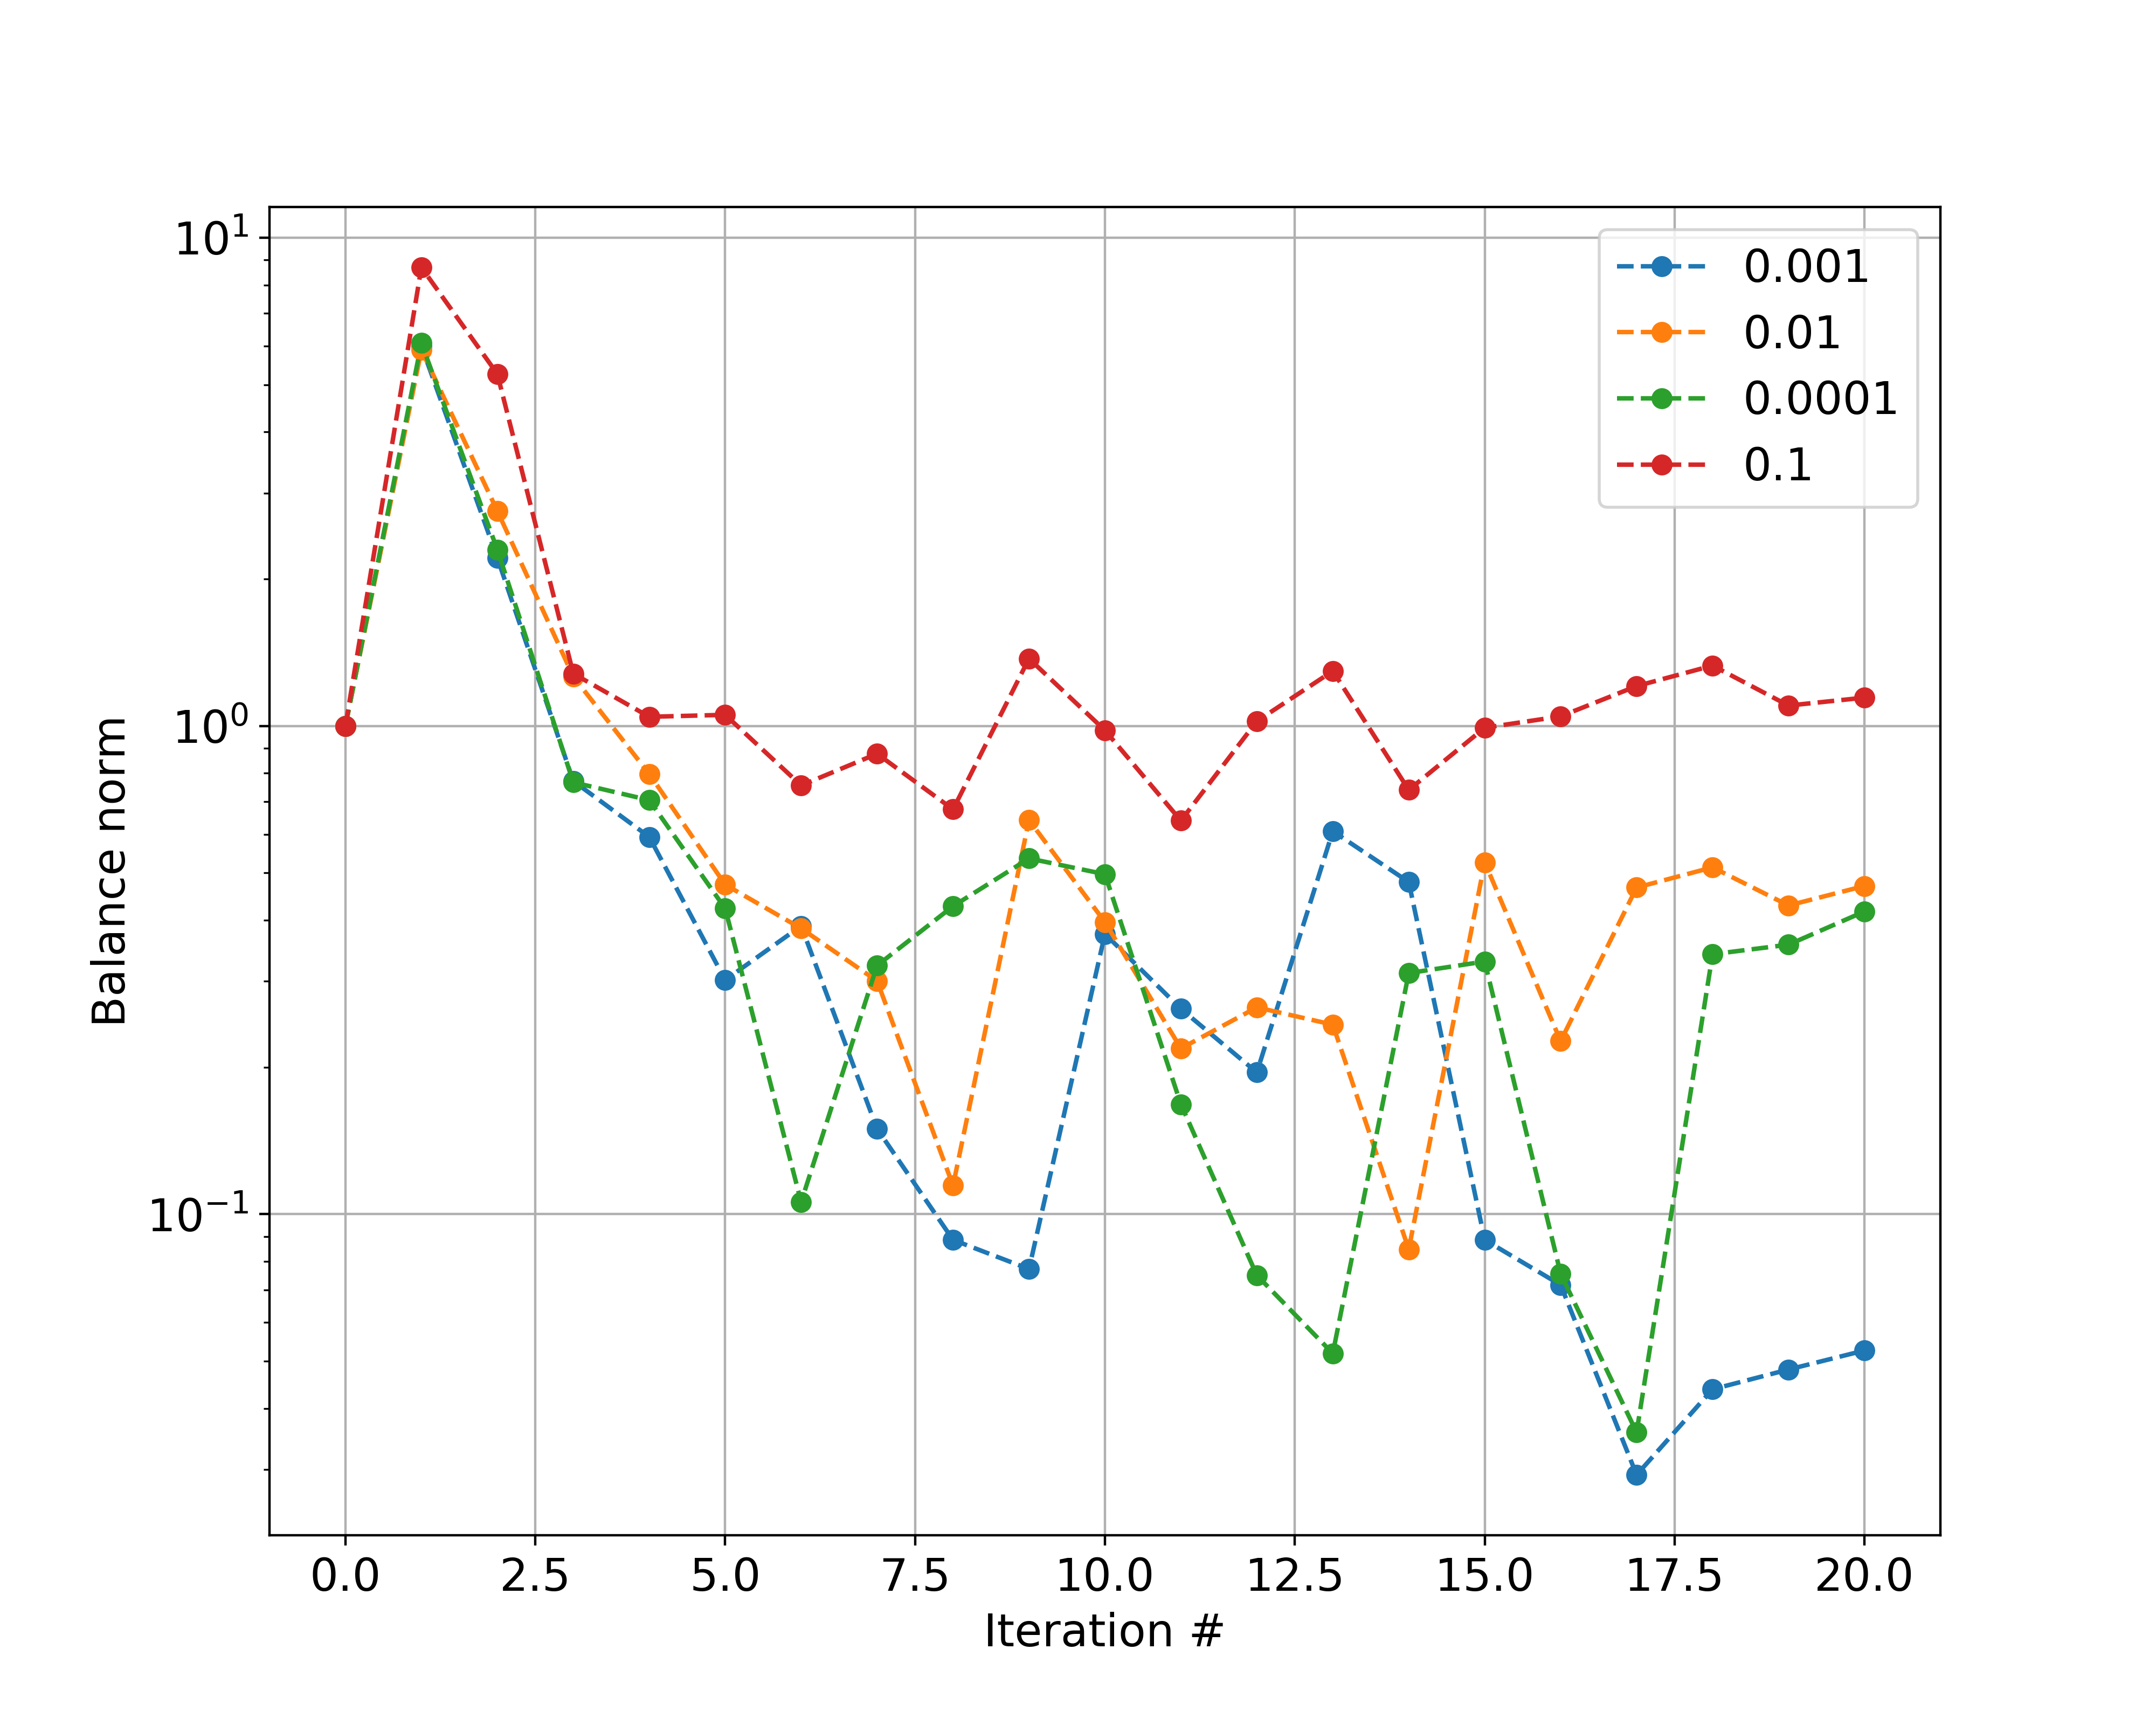

In [9]:
Image(filename="Data/25Nodes/outputs/quals/FW_tol_comparison_with_bumps/balance.png", width=600, height=600)

With no bumps, then, we see the impact of FW tol more strongly as we indeed get to the goal nearly every time. 

Il y en a deux a 10-5 car l un est avec ni=5000 pour etre sur d aller a chaque fois meet l objectif. on voit que ca ne change pas grand chose. les oscillations sont sans aucun doute dues au changement de ri. 

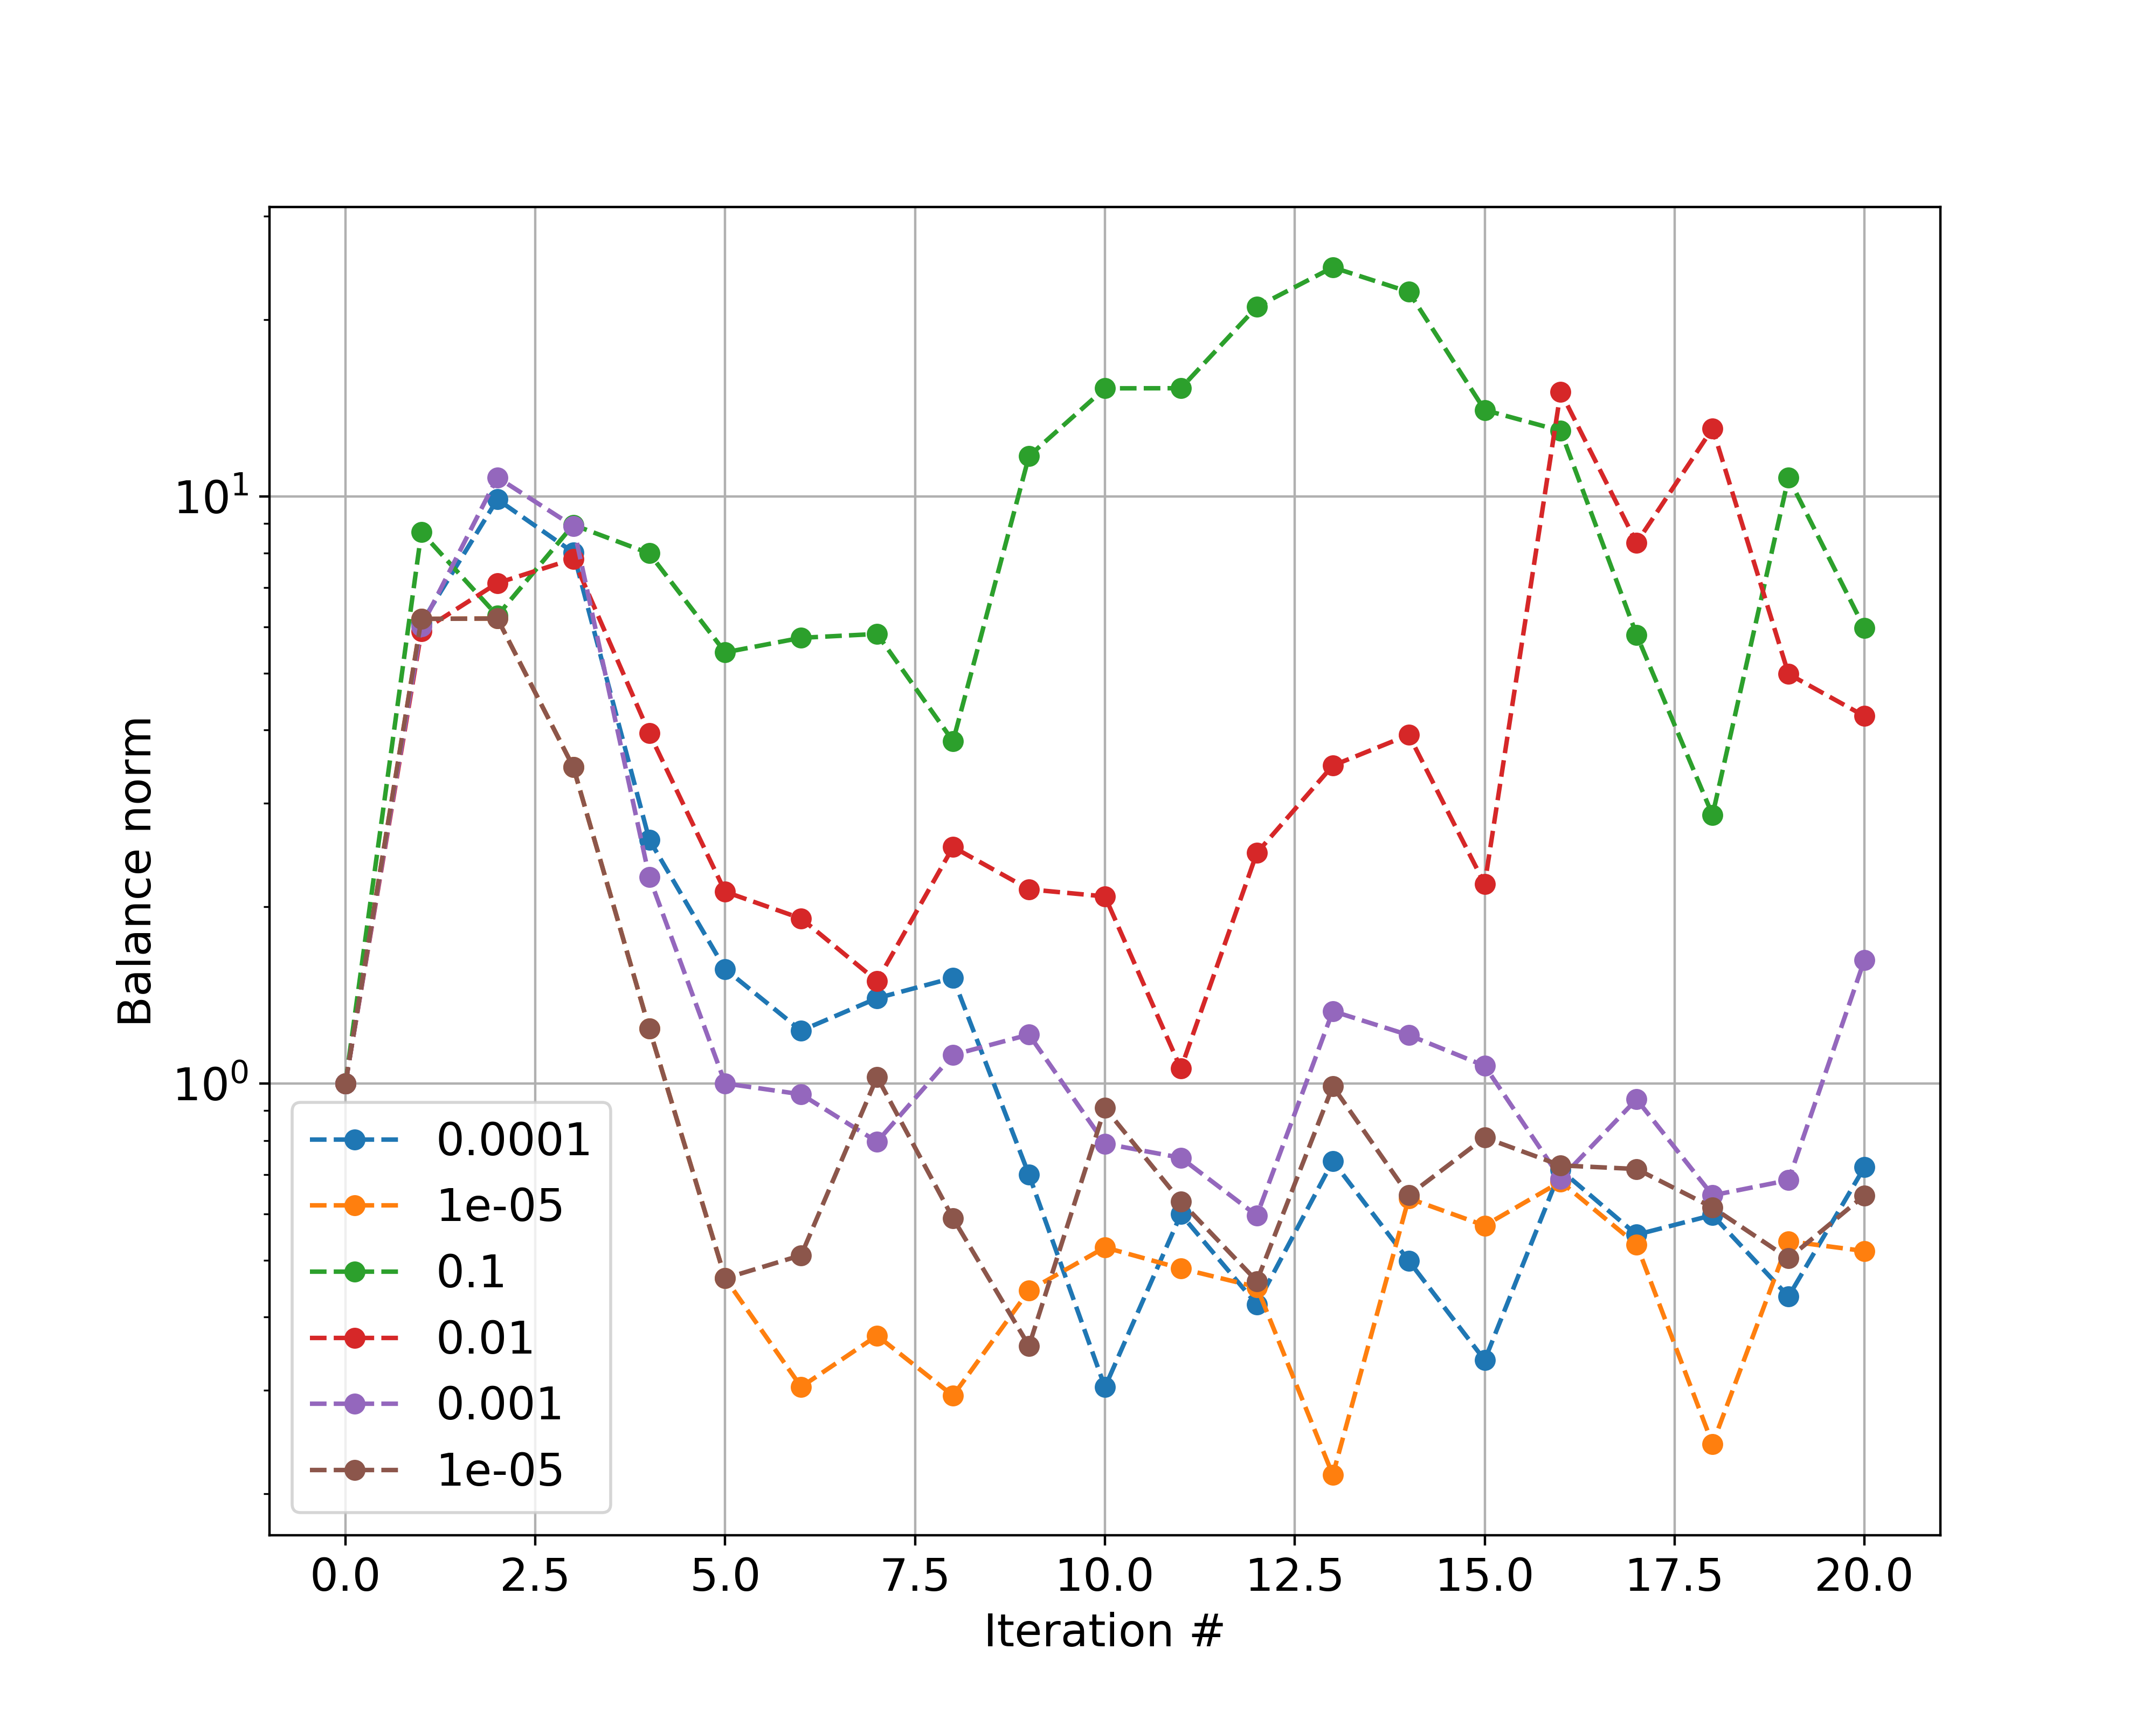

In [41]:
Image(filename="Data/25Nodes/outputs/quals/FW_tol_comparison_no_bumps/balance.png", width=600, height=600)

# Load

In [11]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list

import pandas as pd

from result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
subfolder='FW_tol_comparison_with_bumps'
subfolder2='FW_tol_comparison_no_bumps'

In [13]:
n_nodes=25

In [14]:
path='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder
path2='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder2

In [15]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False_FW_3.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False_FW_2.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False_FW_1.pkl', 'balance.png']


In [42]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW1, n_outer, n_inner, balance, opt_res1, OD_list, balance_list1, params = pickle.load(f)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False_FW_3.pkl


In [34]:
print(os.listdir(path2))

['.DS_Store', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_4.pkl', 'balance.png', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_5.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_1.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_2.pkl', 'output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_3.pkl']


In [44]:
filename=os.listdir(path2)[3]
print(filename)

with open(os.path.join(path2, filename), 'rb') as f:
        G_FW, OD, ri_FW2, n_outer, n_inner, balance2, opt_res2, OD_list, balance_list2, params = pickle.load(f)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True_FW_5.pkl


# With bumps

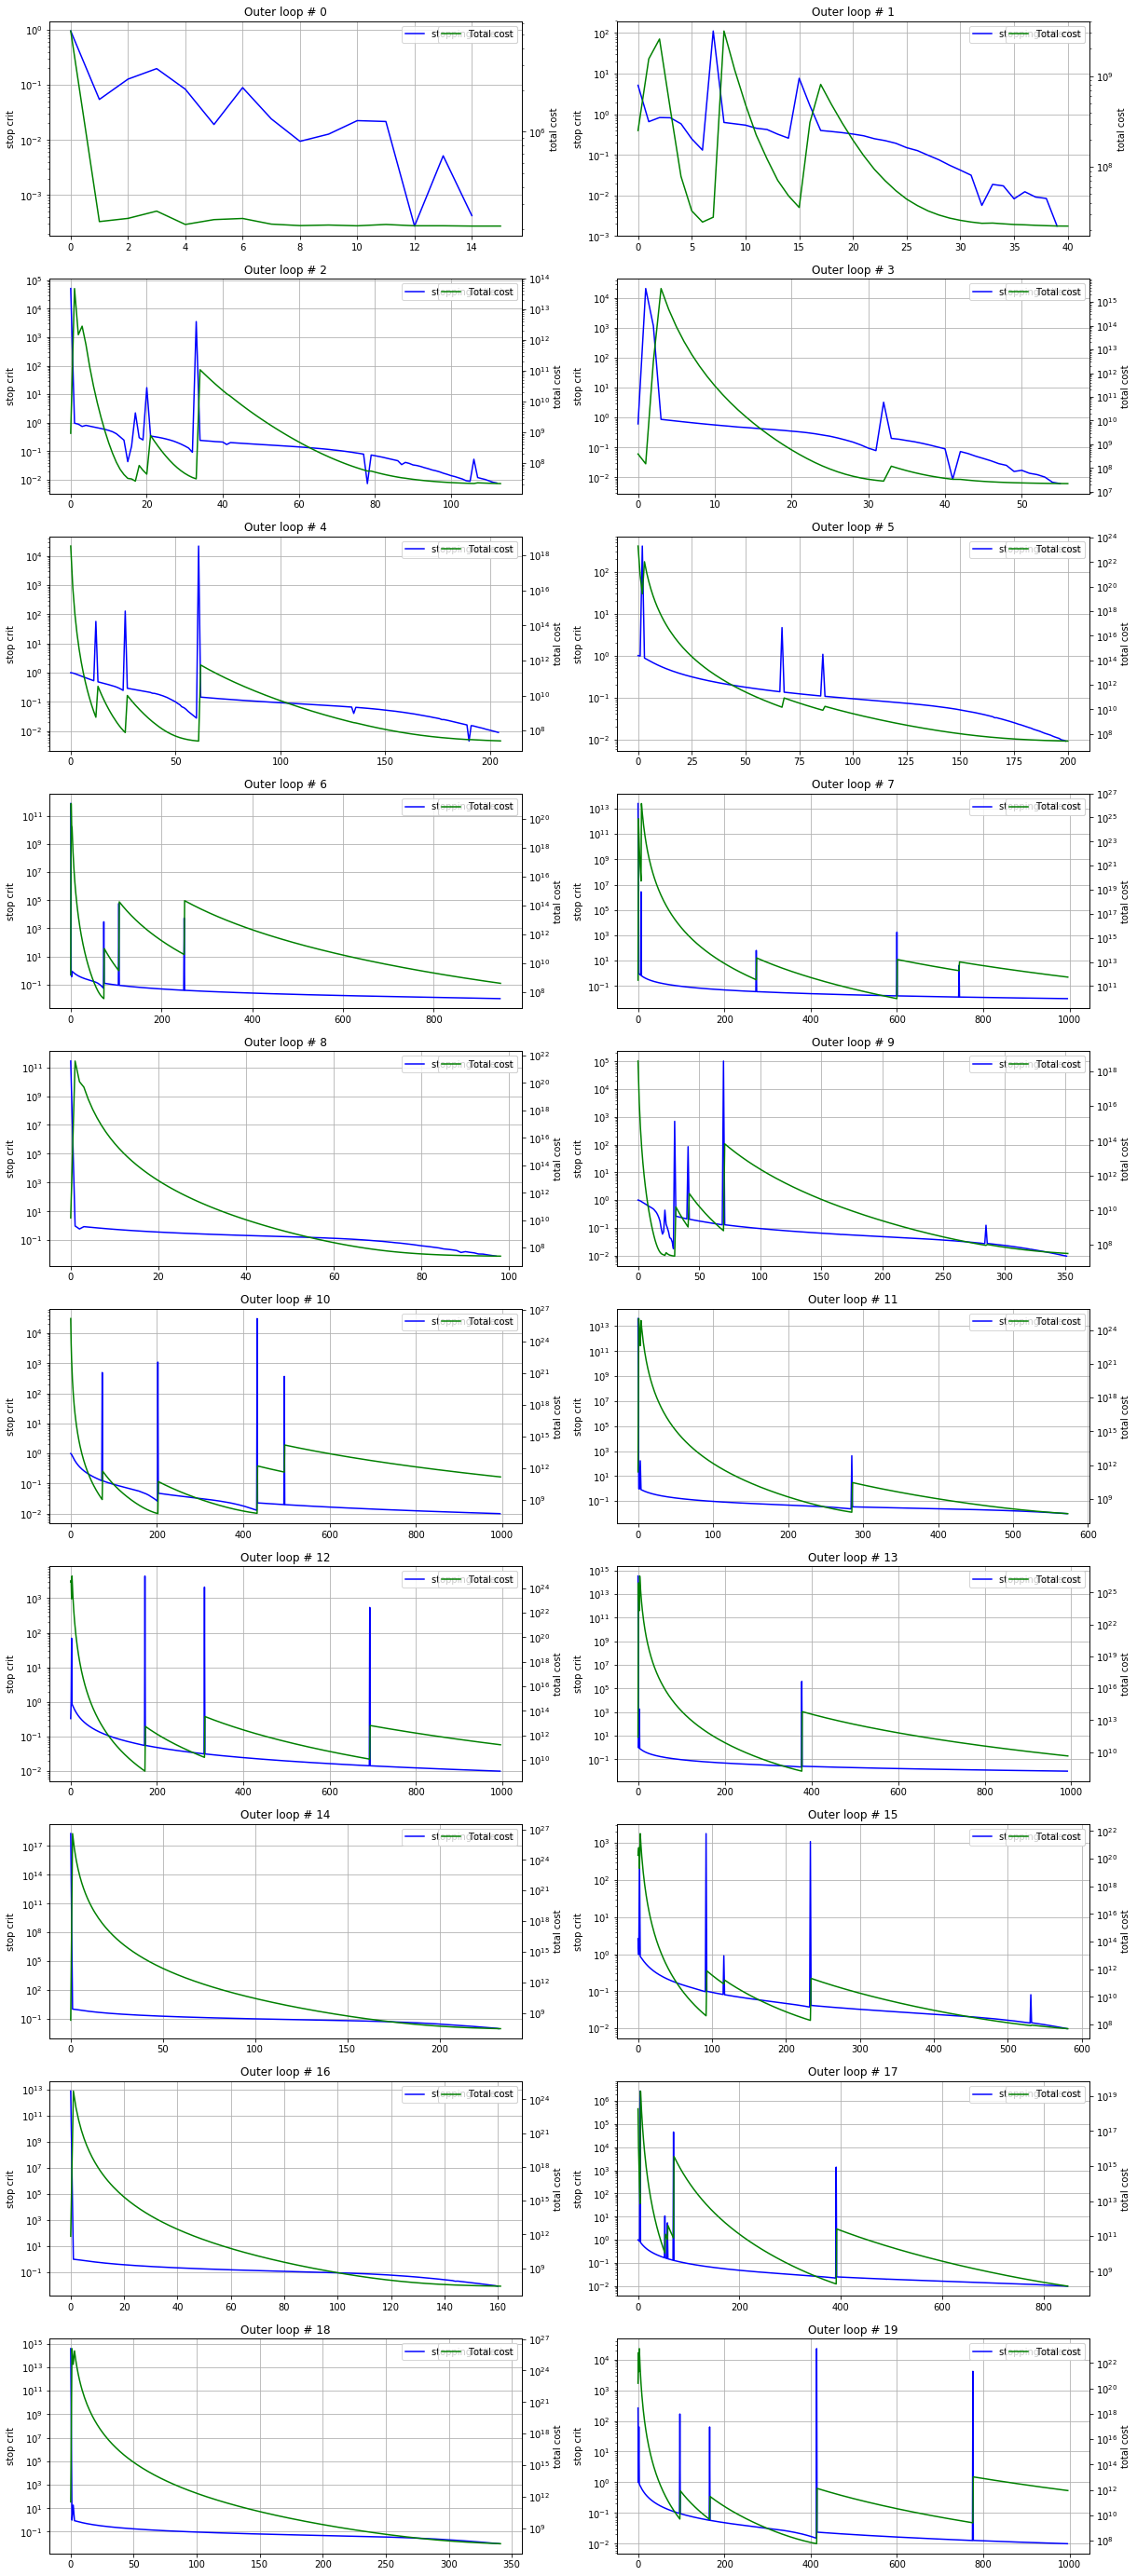

In [23]:
plot_stop_and_cost(opt_res1)

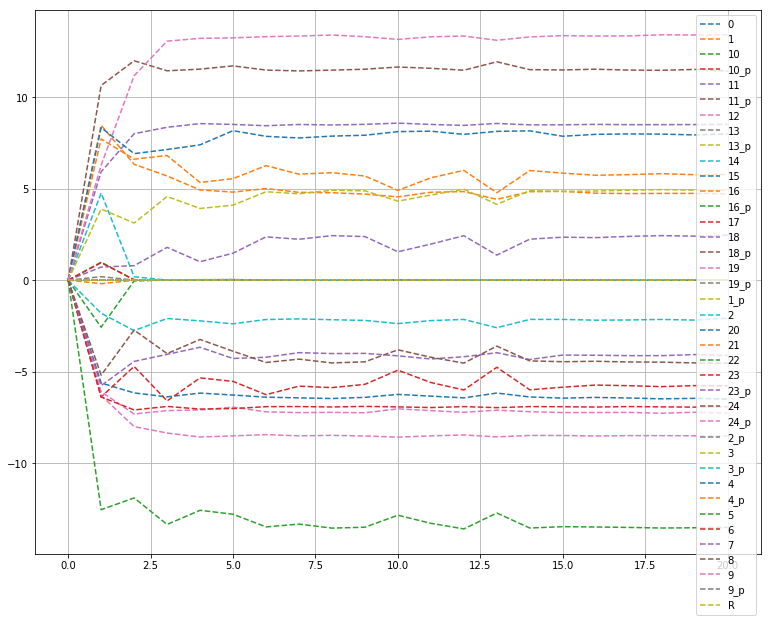

In [43]:
plot_ri_list(ri_FW1)

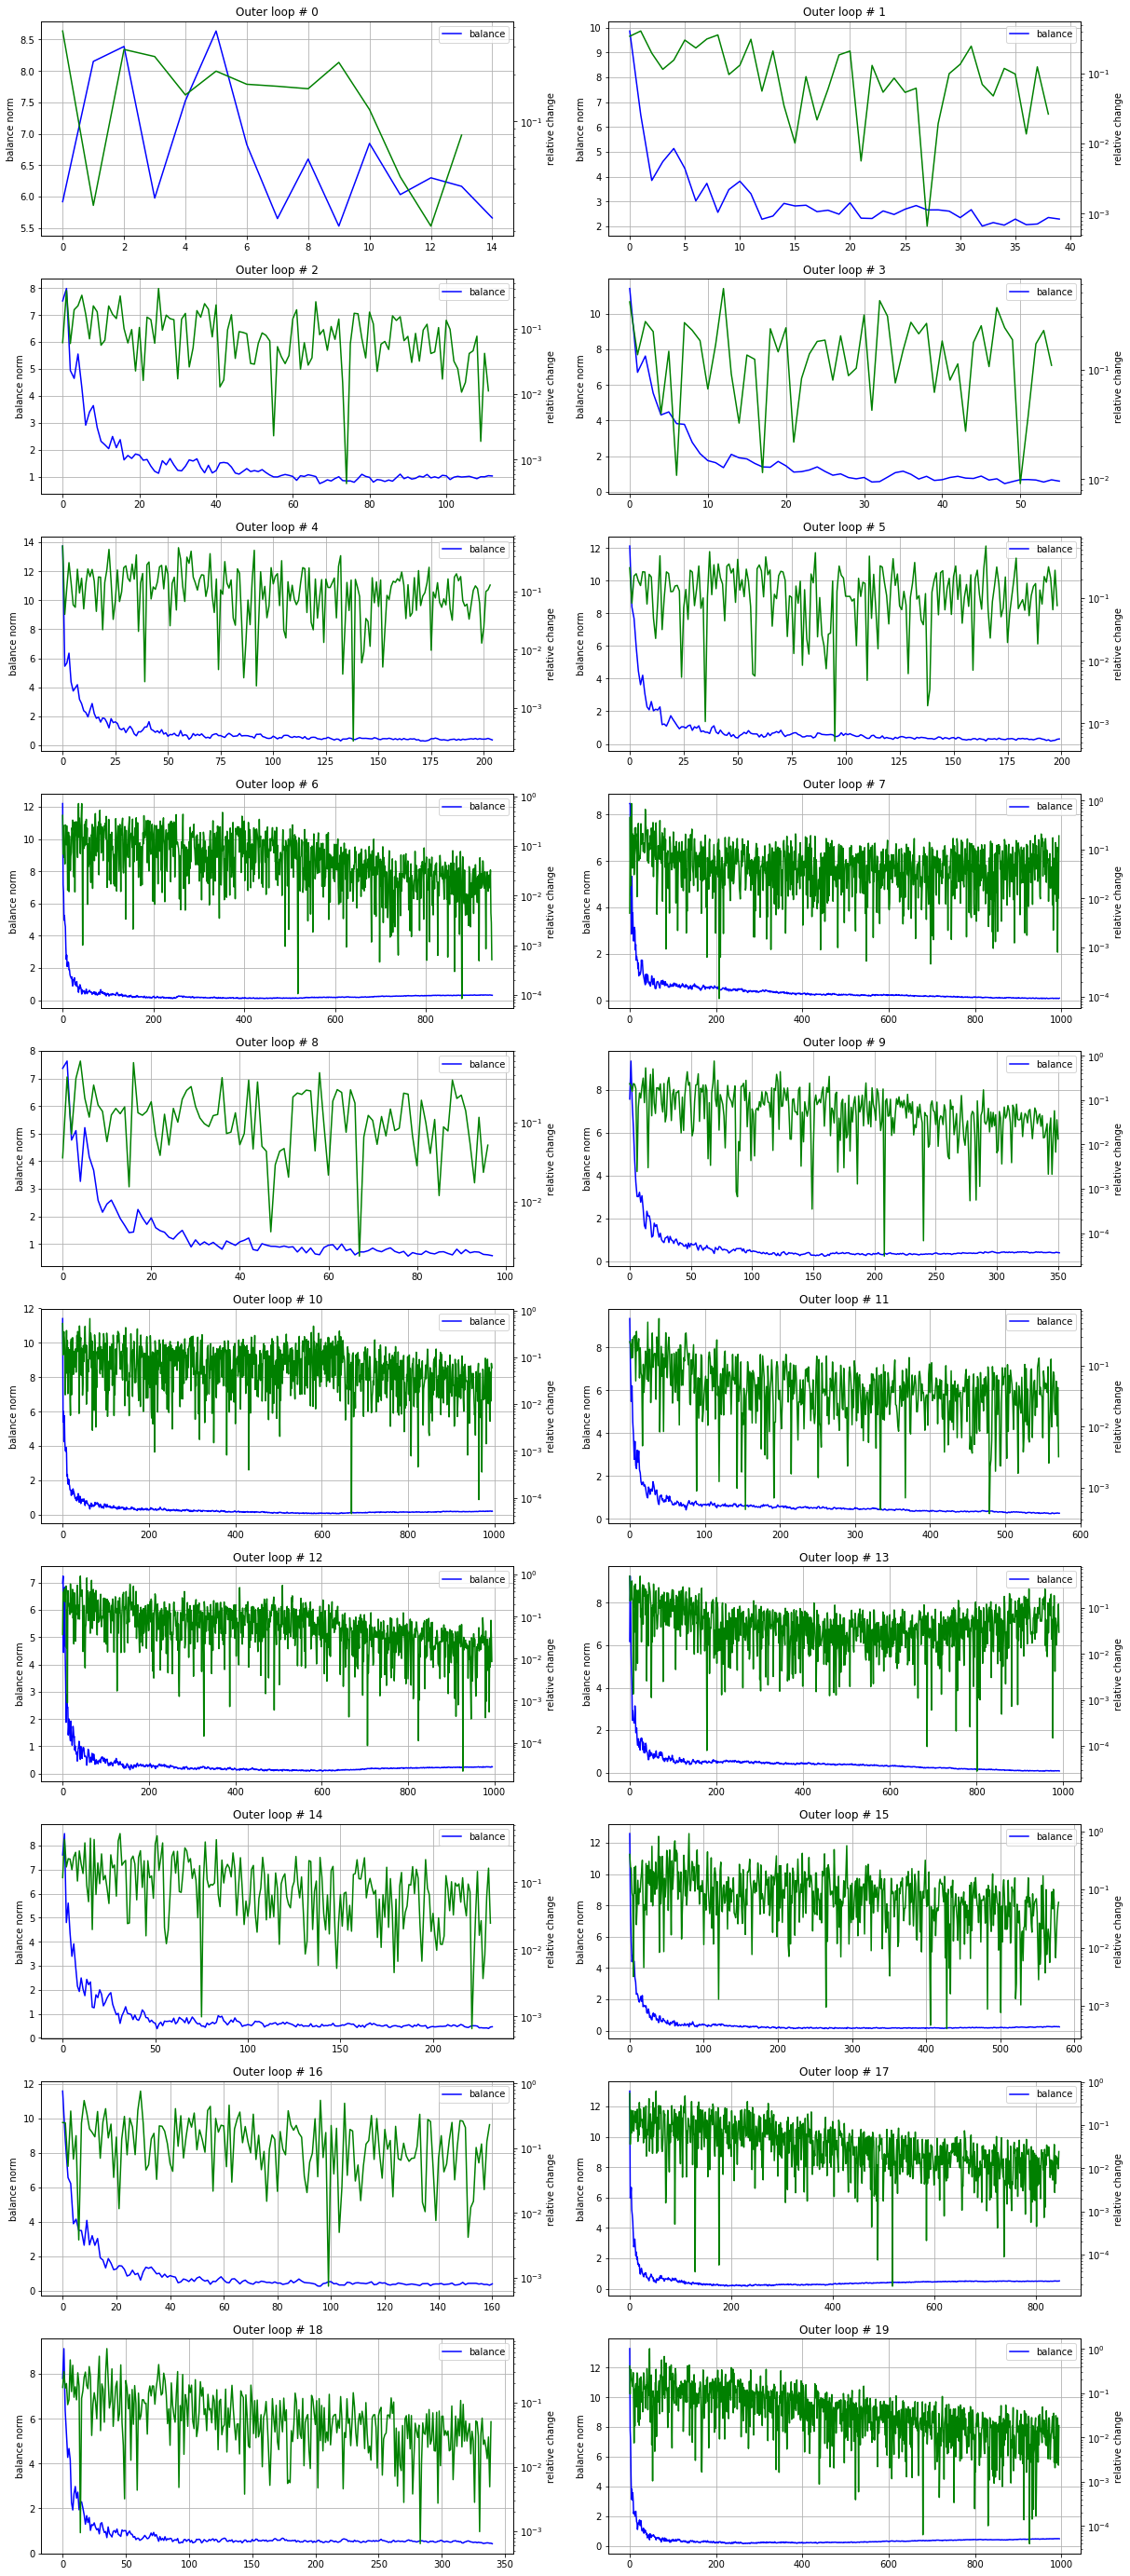

In [25]:
plot_balance_list(balance_list1)

# No Bumps

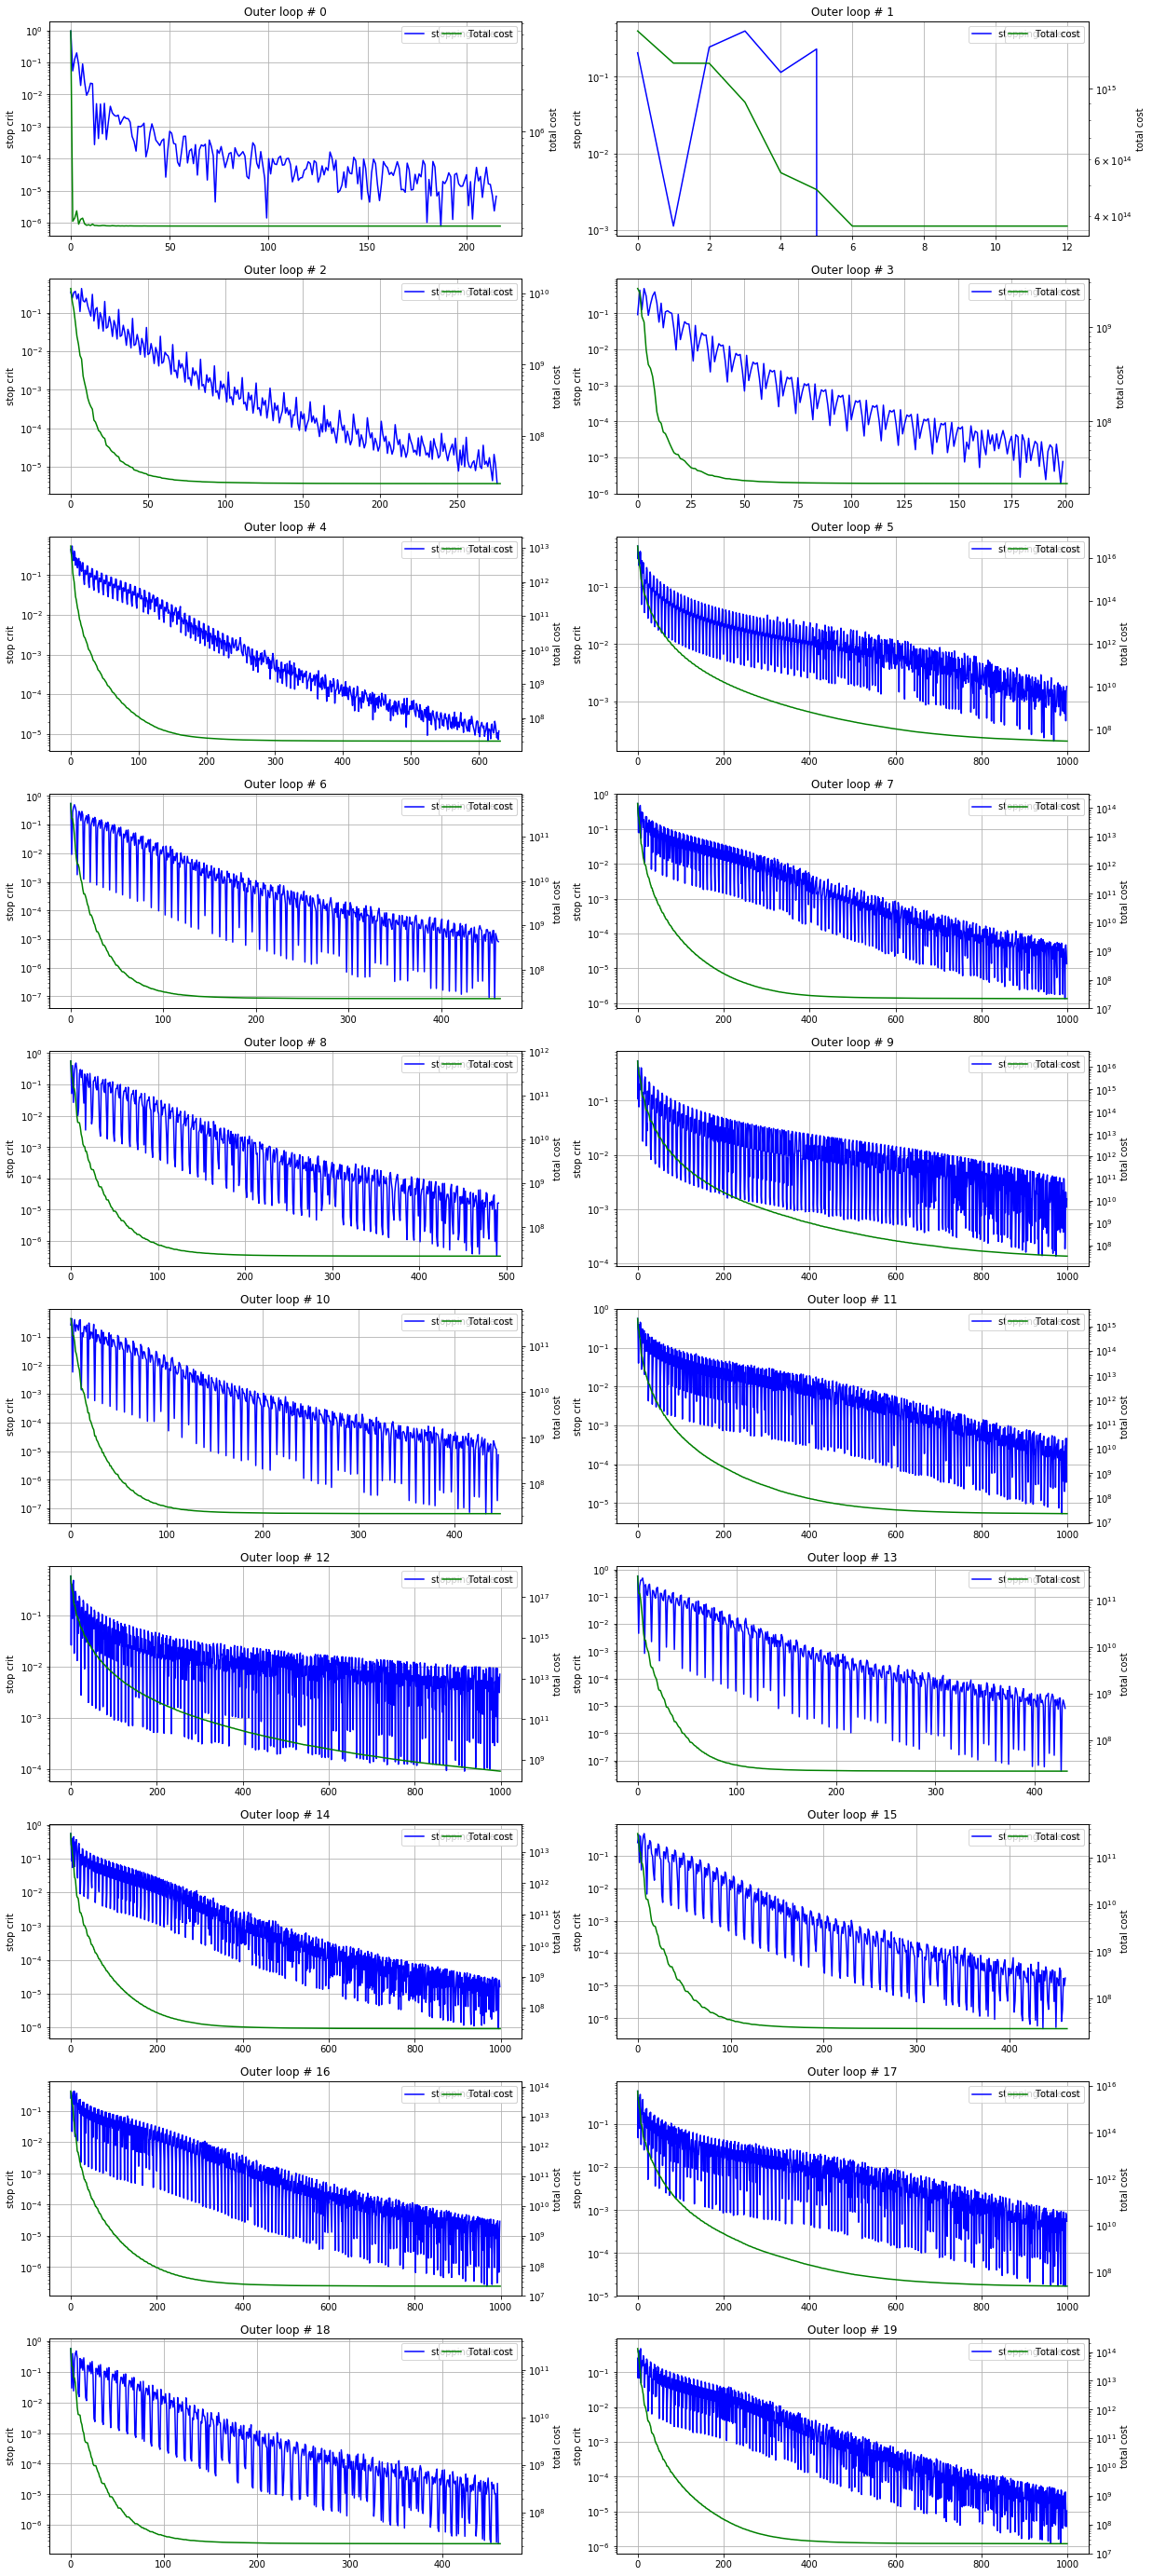

In [39]:
plot_stop_and_cost(opt_res2)

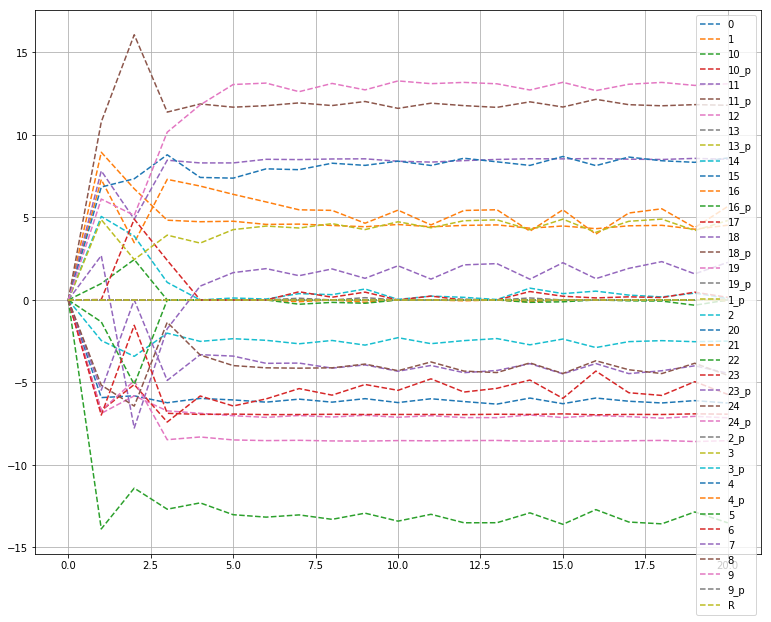

In [40]:
plot_ri_list(ri_FW2)

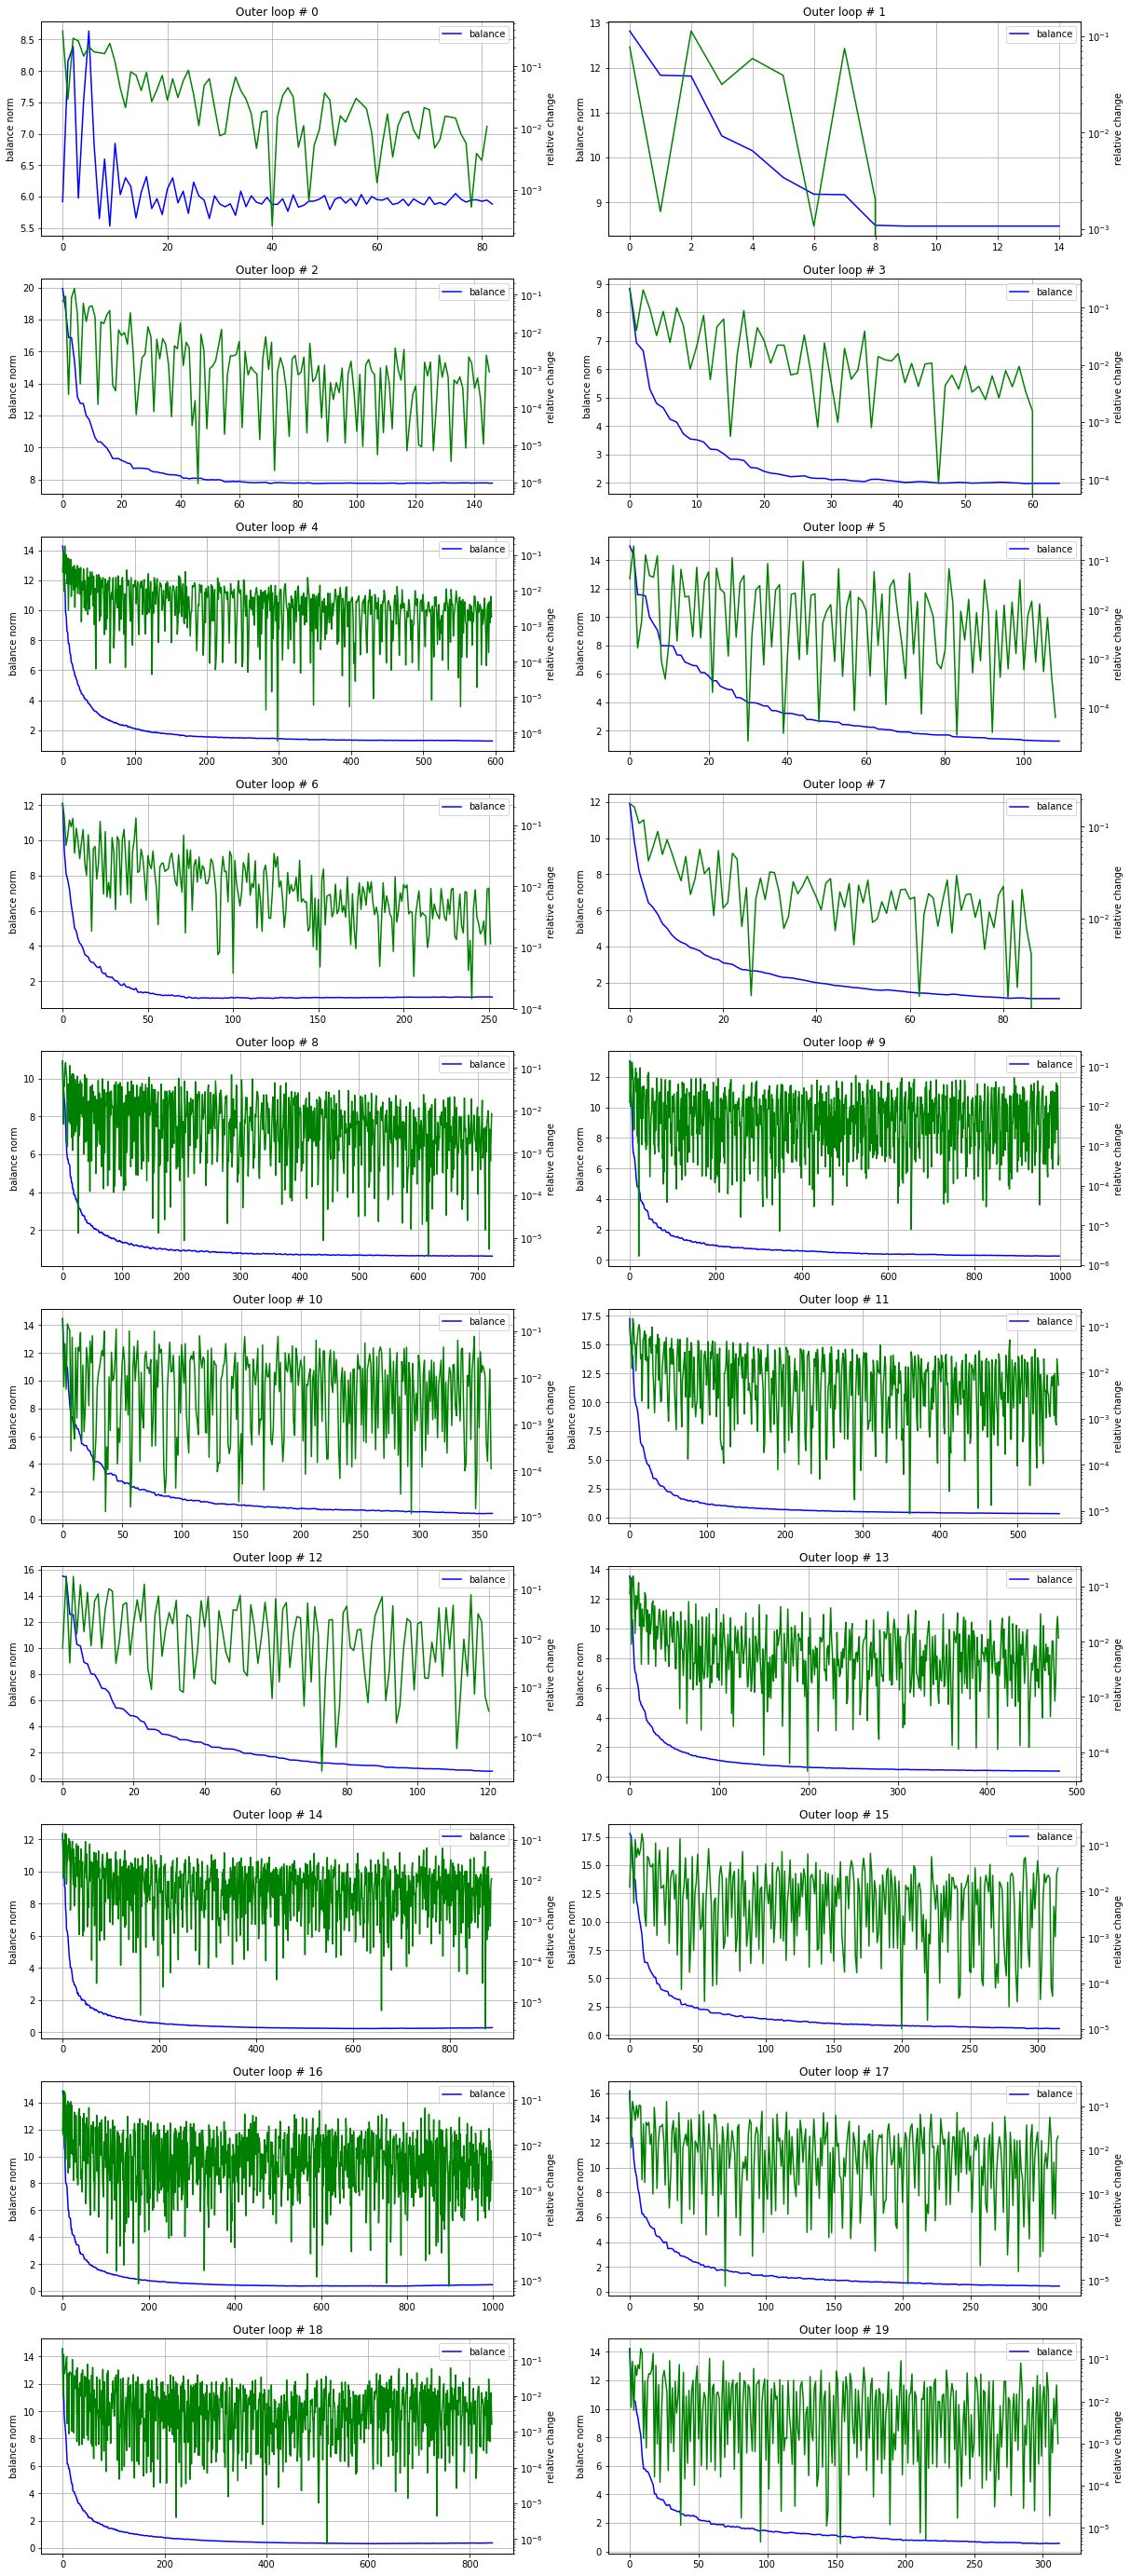

In [32]:
plot_balance_list(balance_list2)

In [46]:
diff_b=[]
for i in range(len(balance2)-1):
    diff_b.append(np.linalg.norm(balance[i]-balance[i+1]))

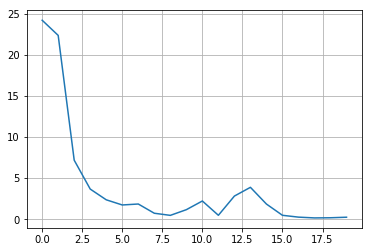

In [48]:
plt.figure()
plt.plot(diff_b)
plt.grid()